# Principal Components Analysis Nutrition Exercise
En este ejercicio no vas a montar ningún modelo de Machine Learning supervisado, sino aprenderás a trabajar con PCA: pretratar el dato antes de calcular sus PCs, interpretarlos, graficar y escoger número de componentes según varianza.

Importa las librerías necesarias

In [9]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

### Importa los datos
1. Importa los datos: *nndb.csv*
2. Observa las columnas que hay, así como su tipo.

In [3]:
nutricion = pd.read_csv("data\\nndb_flat.csv")

In [4]:
nutricion

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,83110,Finfish and Shellfish Products,"MACKEREL,SALTED","Fish, mackerel, salted",NaN,NaN,NaN,305.0,18.50,25.10,...,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,90240,Finfish and Shellfish Products,"SCALLOP,(BAY&SEA),CKD,STMD","Mollusks, scallop, (bay and sea), cooked, steamed",NaN,NaN,NaN,111.0,20.54,0.84,...,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,90480,Sweets,"SYRUP,CANE","Syrup, Cane",NaN,NaN,NaN,269.0,0.00,0.00,...,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90560,Finfish and Shellfish Products,"SNAIL,RAW","Mollusks, snail, raw",NaN,NaN,NaN,90.0,16.10,1.40,...,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


In [5]:
nutricion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


### Mira a ver la correlación entre las variables numéricas
¿Qué pasa con las columnas USRDA? ¿Hay que tomar alguna decisión?

In [8]:
corr_matrix = nutricion.corr(numeric_only=True)

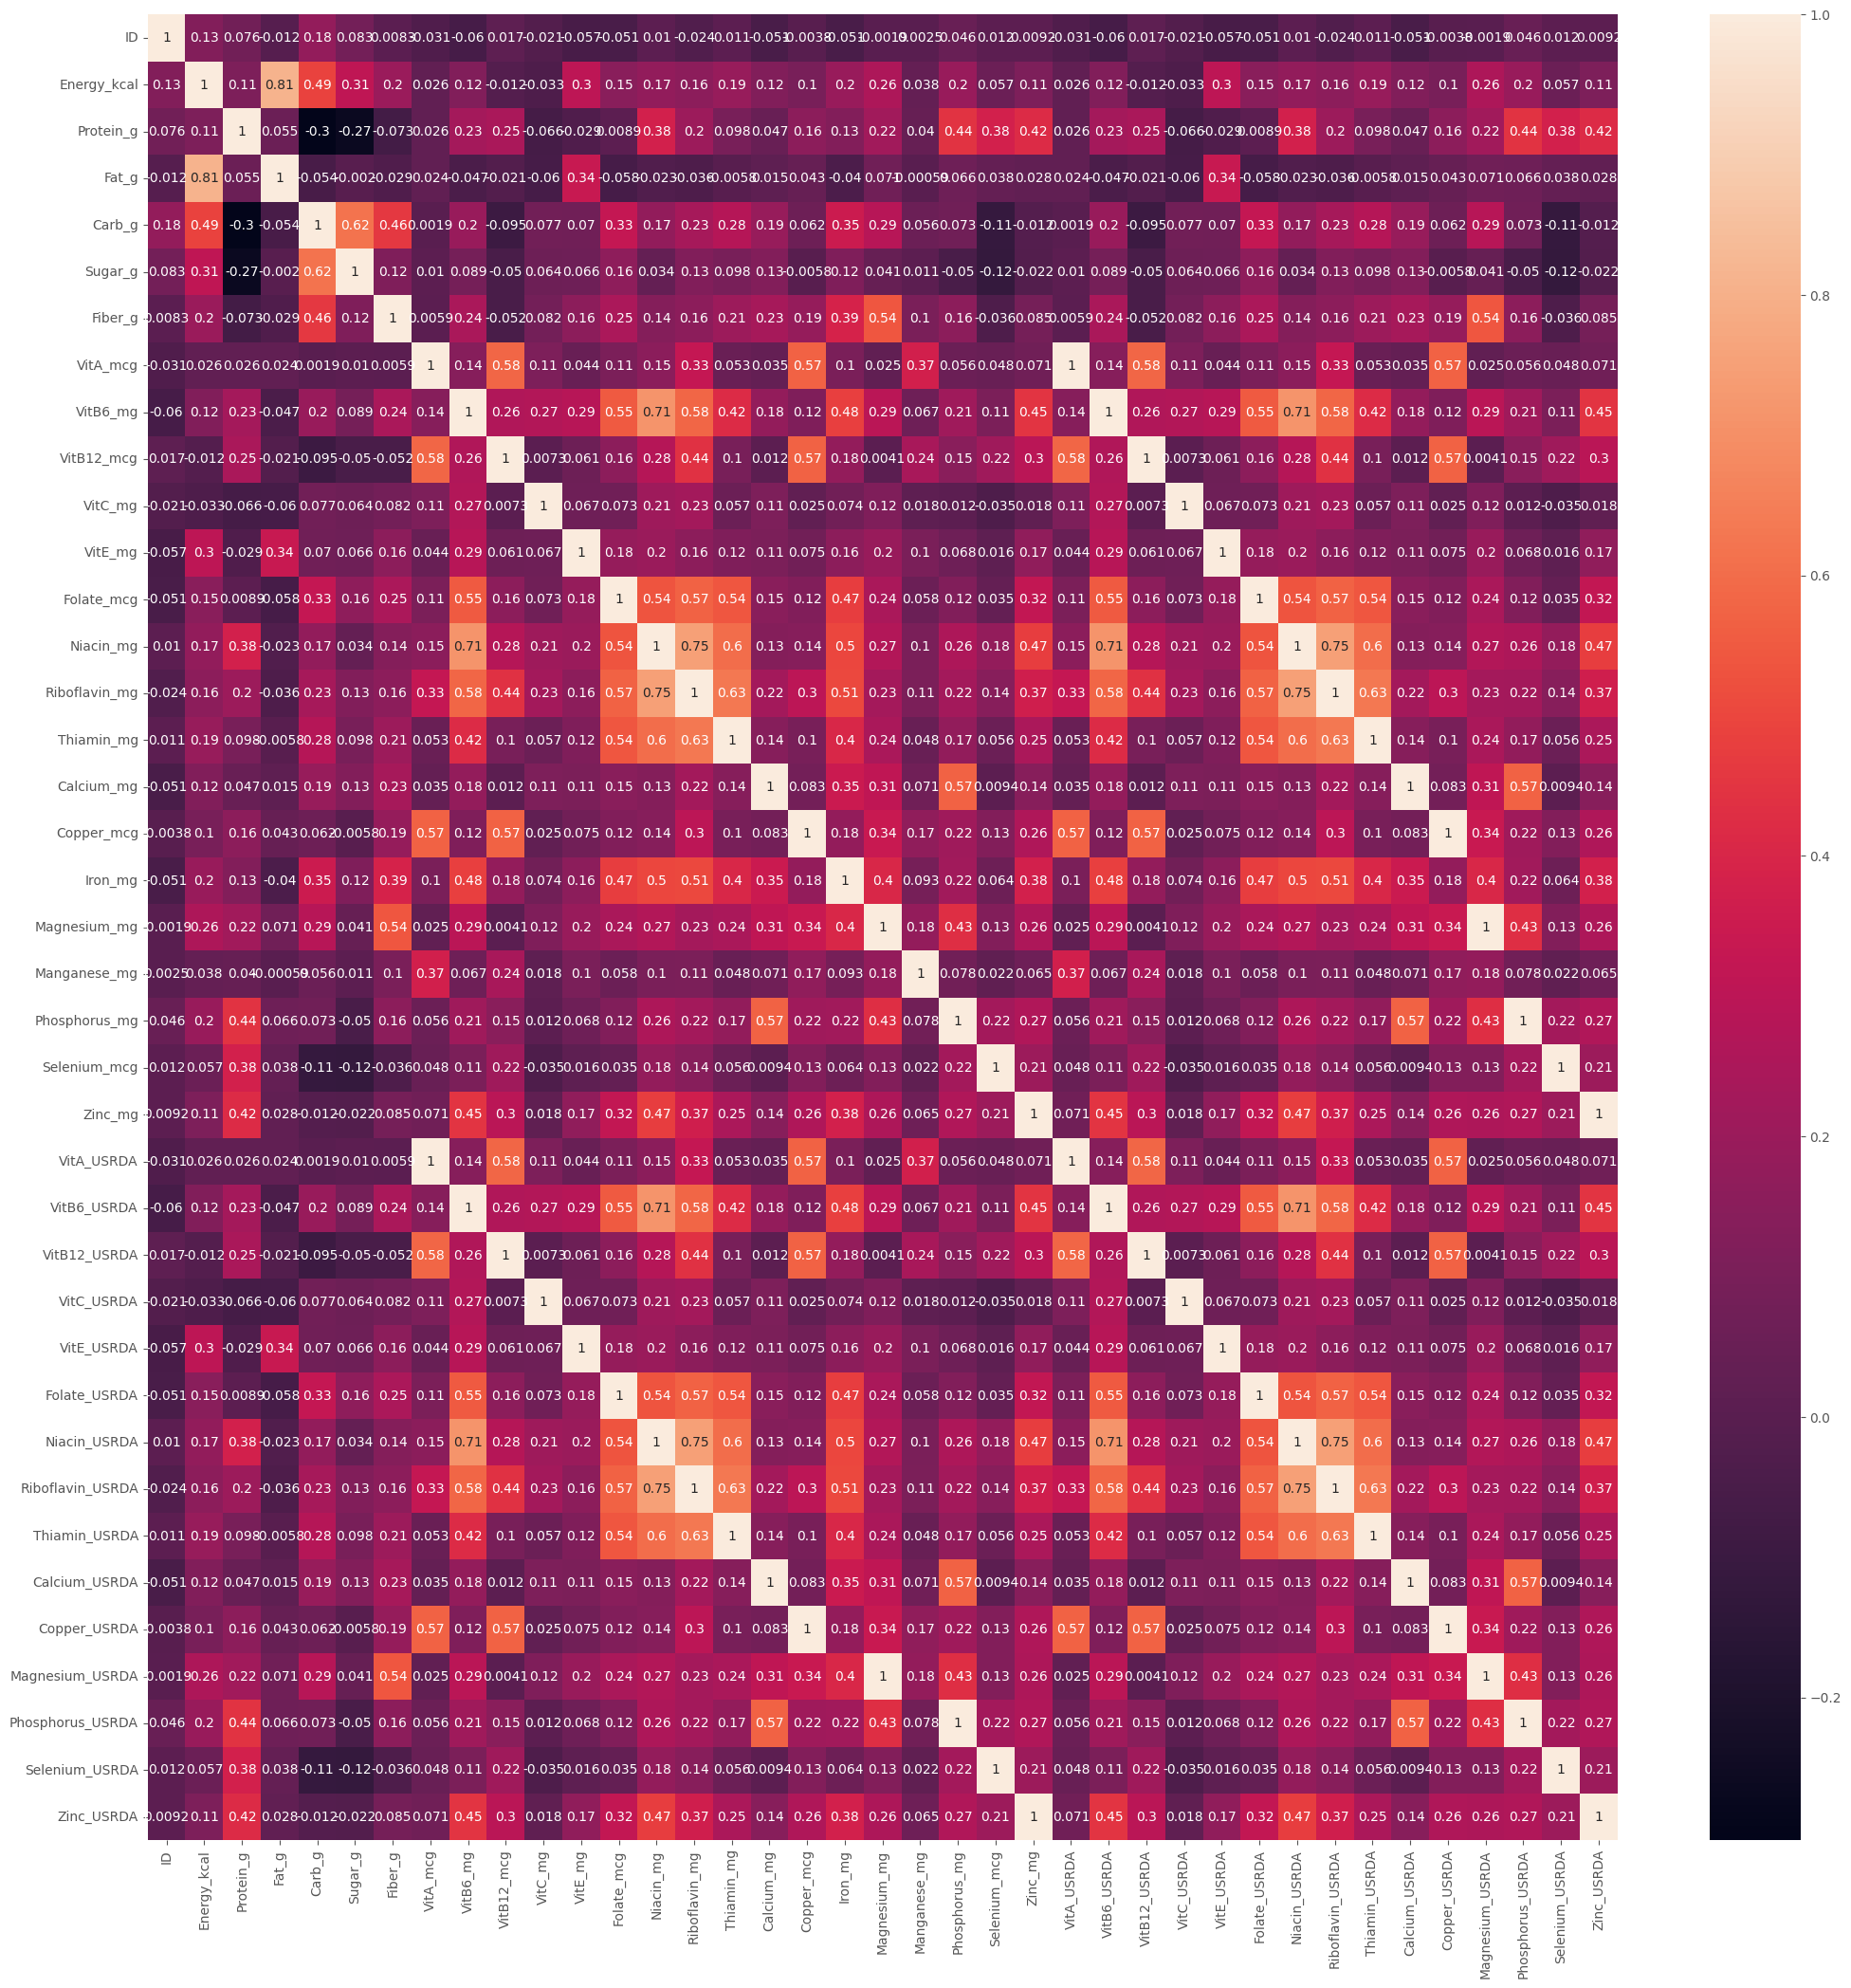

In [14]:
plt.figure(figsize=(25,25))
sns.heatmap(corr_matrix, annot=True)
plt.show()

### Variables no numéricas
Elimina las variables de texto del dataset

In [17]:
nutricion_num = nutricion.drop(["FoodGroup","ShortDescrip","Descrip","CommonName","MfgName","ScientificName"],axis=1)

In [18]:
nutricion_num

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,83110,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,...,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,90240,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,...,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,90480,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,...,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90560,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,...,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


### Distribuciones
Muchas de las variables tienen asimetría hacia la derecha. Deberíamos transformarlas para conseguir distribuciones normales y mejorar las correlaciones de cara al PCA y a futuros modelos lineales que vayamos a probar. Transforma todas las variables realizando una transformación Logarítmica.

In [25]:
nutri_log1p = np.log1p(nutricion_num)

In [26]:
nutri_log1p

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,6.909753,6.576470,0.615186,4.408060,0.058269,0.058269,0.0,6.529419,0.002996,0.157004,...,0.007472,0.002622,0.025818,0.004158,0.019803,0.000000,0.004751,0.033711,0.018019,0.008149
1,6.910751,6.576470,0.615186,4.408060,0.058269,0.058269,0.0,6.529419,0.002996,0.122218,...,0.007472,0.002622,0.025818,0.004158,0.019803,0.000018,0.004751,0.032329,0.018019,0.004535
2,6.911747,6.776507,0.246860,4.609959,0.000000,0.000000,0.0,6.734592,0.001000,0.009950,...,0.000000,0.000187,0.003839,0.000833,0.003328,0.000001,0.000000,0.004277,0.000000,0.000909
3,6.912743,5.869297,3.109061,3.392493,1.205971,0.405465,0.0,5.293305,0.153579,0.797507,...,0.086178,0.061565,0.257619,0.023879,0.364643,0.000044,0.053315,0.440097,0.233994,0.216577
4,6.913737,5.918894,3.188004,3.423611,1.332366,0.412110,0.0,5.680173,0.062975,0.815365,...,0.048790,0.007348,0.239017,0.011599,0.445754,0.000027,0.055570,0.497306,0.233994,0.212175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,11.327932,5.723585,2.970414,3.261935,0.000000,0.000000,0.0,3.871201,0.343590,2.564949,...,0.036814,0.187516,0.136412,0.016529,0.053541,0.000111,0.133531,0.309583,0.847817,0.095310
8614,11.410239,4.718499,3.069912,0.609766,1.857859,0.000000,0.0,1.098612,0.106160,1.147402,...,0.048790,0.065085,0.018293,0.009950,0.008299,0.000037,0.084429,0.475346,0.332569,0.131825
8615,11.412895,5.598422,0.000000,0.000000,4.305955,4.306764,0.0,0.000000,0.000000,0.000000,...,0.000000,0.006231,0.045120,0.102857,0.010775,0.000022,0.023530,0.011364,0.012647,0.017125
8616,11.413779,4.510860,2.839078,0.875469,1.098612,0.000000,0.0,3.433987,0.122218,0.405465,...,0.014889,0.083881,0.088293,0.008299,0.008299,0.000444,0.467023,0.328275,0.404252,0.087011


### Estandarizado
Estandariza cada variable.

No es necesario que dividas en train y test.

In [27]:
estandarizado = StandardScaler()
nutri_standard = estandarizado.fit_transform(nutri_log1p)

In [29]:
datos_estandarizados = pd.DataFrame(nutri_standard, columns=nutri_log1p.columns)

In [30]:
datos_estandarizados

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,-3.480717,1.540414,-1.379699,2.222526,-1.279339,-0.751381,-0.817818,2.363105,-0.811366,-0.453749,...,-0.370982,-0.908747,-0.657634,-0.662004,-0.308239,-0.312588,-0.657347,-0.935289,-0.728859,-0.767043
1,-3.479343,1.540414,-1.379699,2.222526,-1.279339,-0.751381,-0.817818,2.363105,-0.811366,-0.506894,...,-0.370982,-0.908747,-0.657634,-0.662004,-0.308239,-0.283509,-0.657347,-0.943791,-0.728859,-0.787228
2,-3.477969,1.745661,-1.728220,2.393490,-1.315522,-0.796963,-0.817818,2.463472,-0.819681,-0.678411,...,-0.406514,-0.921739,-0.777857,-0.678859,-0.464122,-0.310770,-0.705592,-1.116339,-0.811468,-0.807485
3,-3.476598,0.814824,0.980084,1.362565,-0.566664,-0.479778,-0.817818,1.758419,-0.184016,0.524785,...,0.003292,-0.594143,0.610310,-0.562034,2.954611,-0.239893,-0.164140,1.564362,0.261316,0.397249
4,-3.475227,0.865713,1.054782,1.388915,-0.488178,-0.474580,-0.817818,1.947668,-0.561485,0.552068,...,-0.174499,-0.883521,0.508555,-0.624284,3.722071,-0.268970,-0.141241,1.916255,0.261316,0.372659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,2.607443,0.665317,0.848892,1.252011,-1.315522,-0.796963,-0.817818,1.062751,0.607592,3.225009,...,-0.231450,0.078102,-0.052689,-0.599292,0.010988,-0.130857,0.650513,0.761584,3.075496,-0.280153
8614,2.720860,-0.365945,0.943039,-0.993791,-0.161868,-0.796963,-0.817818,-0.293552,-0.381569,1.059341,...,-0.174499,-0.575356,-0.698792,-0.632642,-0.417087,-0.252614,0.151841,1.781183,0.713250,-0.076176
8615,2.724520,0.536895,-1.961806,-1.510128,1.358297,2.572113,-0.817818,-0.830974,-0.823845,-0.693613,...,-0.406514,-0.889485,-0.552049,-0.161682,-0.393657,-0.276240,-0.466624,-1.072746,-0.753486,-0.716899
8616,2.725737,-0.578992,0.724618,-0.768799,-0.633329,-0.796963,-0.817818,0.848873,-0.314672,-0.074160,...,-0.335714,-0.475034,-0.315899,-0.641013,-0.417087,0.414215,4.037356,0.876558,1.041896,-0.326510


In [31]:
datos_estandarizados.drop("ID",axis=1)

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1.540414,-1.379699,2.222526,-1.279339,-0.751381,-0.817818,2.363105,-0.811366,-0.453749,-0.63502,...,-0.370982,-0.908747,-0.657634,-0.662004,-0.308239,-0.312588,-0.657347,-0.935289,-0.728859,-0.767043
1,1.540414,-1.379699,2.222526,-1.279339,-0.751381,-0.817818,2.363105,-0.811366,-0.506894,-0.63502,...,-0.370982,-0.908747,-0.657634,-0.662004,-0.308239,-0.283509,-0.657347,-0.943791,-0.728859,-0.787228
2,1.745661,-1.728220,2.393490,-1.315522,-0.796963,-0.817818,2.463472,-0.819681,-0.678411,-0.63502,...,-0.406514,-0.921739,-0.777857,-0.678859,-0.464122,-0.310770,-0.705592,-1.116339,-0.811468,-0.807485
3,0.814824,0.980084,1.362565,-0.566664,-0.479778,-0.817818,1.758419,-0.184016,0.524785,-0.63502,...,0.003292,-0.594143,0.610310,-0.562034,2.954611,-0.239893,-0.164140,1.564362,0.261316,0.397249
4,0.865713,1.054782,1.388915,-0.488178,-0.474580,-0.817818,1.947668,-0.561485,0.552068,-0.63502,...,-0.174499,-0.883521,0.508555,-0.624284,3.722071,-0.268970,-0.141241,1.916255,0.261316,0.372659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,0.665317,0.848892,1.252011,-1.315522,-0.796963,-0.817818,1.062751,0.607592,3.225009,-0.63502,...,-0.231450,0.078102,-0.052689,-0.599292,0.010988,-0.130857,0.650513,0.761584,3.075496,-0.280153
8614,-0.365945,0.943039,-0.993791,-0.161868,-0.796963,-0.817818,-0.293552,-0.381569,1.059341,-0.63502,...,-0.174499,-0.575356,-0.698792,-0.632642,-0.417087,-0.252614,0.151841,1.781183,0.713250,-0.076176
8615,0.536895,-1.961806,-1.510128,1.358297,2.572113,-0.817818,-0.830974,-0.823845,-0.693613,-0.63502,...,-0.406514,-0.889485,-0.552049,-0.161682,-0.393657,-0.276240,-0.466624,-1.072746,-0.753486,-0.716899
8616,-0.578992,0.724618,-0.768799,-0.633329,-0.796963,-0.817818,0.848873,-0.314672,-0.074160,-0.63502,...,-0.335714,-0.475034,-0.315899,-0.641013,-0.417087,0.414215,4.037356,0.876558,1.041896,-0.326510


### Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

In [32]:
pca = PCA(n_components=38)

In [33]:
pca_result = pca.fit_transform(datos_estandarizados)

### Aportación de cada PCA
Visualiza en un diagrama de líneas la suma acumulada de la varianza explicativa del PCA.

Si tuviéses que quedarte con 70-75 % de la varianza original, ¿con cuántos Principal Components te quedarías?

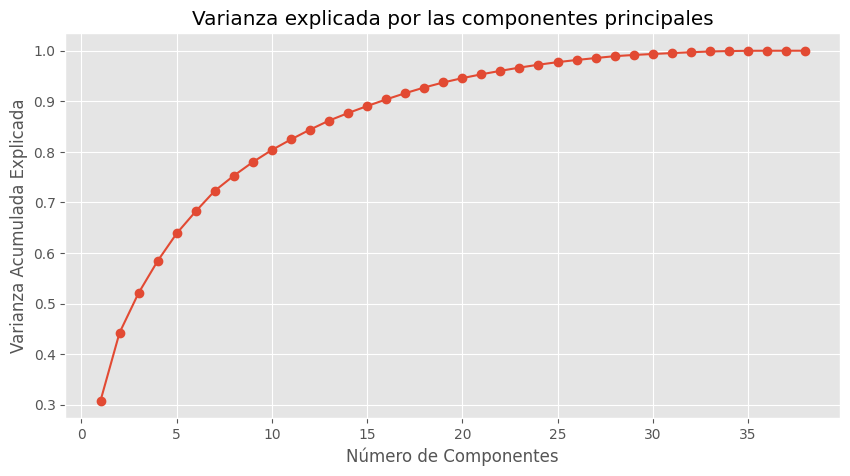

In [35]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 39), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada Explicada')
plt.title('Varianza explicada por las componentes principales')
plt.grid(True)
plt.show()

##### Si quisiera quedarme con el 70-75% de la varianza original, me quedaría con 8 componentes principales

## Feat. Red
Crea un nuevo PCA con X Principal Components, siendo X la cantidad de PC escogidos en el apartado anterior.

Obtén el nuevo dataset con el mismo número de registros que el original, pero en este caso con X features, que representan los PC elegidos.

In [36]:
nuevo_pca = PCA(n_components=8)

In [37]:
nuevo_pca_result = nuevo_pca.fit_transform(datos_estandarizados)

In [39]:
df_pca_8 = pd.DataFrame(nuevo_pca_result, columns=[f'PC{i+1}' for i in range(8)])

In [40]:
df_pca_8

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-2.872949,-0.041708,-1.059564,2.071717,4.316022,-1.091657,1.947041,1.691916
1,-2.856397,0.017080,-1.025593,2.067338,4.304479,-1.034733,1.962871,1.692802
2,-3.783940,0.019644,-1.713222,1.630430,5.214884,-0.210496,1.937739,1.490594
3,1.661086,-0.848726,0.582730,2.815806,1.032576,-3.945505,2.637959,-0.053281
4,1.414139,-0.688807,0.940228,3.345741,1.222156,-4.348554,3.254416,-0.483591
...,...,...,...,...,...,...,...,...
8613,3.219667,-3.762370,-0.083864,1.784162,1.831528,-0.387301,-0.207174,0.490515
8614,-0.004330,-2.525394,1.228694,0.752237,-1.334395,0.112573,-0.442273,0.217634
8615,-3.531264,1.426062,0.254081,-2.154667,-0.279454,1.205619,1.074512,-0.927898
8616,1.397521,-0.447289,2.591885,2.167310,1.272417,0.974047,-2.356329,0.644200


### ¿Qué grupo de comida tiene los valores más altos en cada categoría?
Determina para cada Principal Component, los 3 grupos de comida (*FoodGroup*) con los valores del PC más altos.

In [43]:
reconstruido = nuevo_pca.inverse_transform(df_pca_8)

In [44]:
reconstruido

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,-1.434226,0.536024,-0.855527,1.325550,-0.326761,0.395883,-1.142658,2.184957,-1.087933,-0.072553,...,-0.320906,-1.101418,-0.301568,-1.038789,0.292152,-0.071310,-1.381027,-0.679855,0.069857,-1.242797
1,-1.418240,0.544369,-0.863997,1.321252,-0.296572,0.409559,-1.113122,2.177219,-1.094505,-0.086262,...,-0.308386,-1.104905,-0.295898,-1.025863,0.287056,-0.033616,-1.358948,-0.679766,0.057585,-1.246479
2,-1.259434,0.640694,-1.242694,1.505506,-0.328042,0.593967,-1.218773,1.991459,-1.137142,-0.040714,...,-0.423675,-1.156028,-0.326996,-1.079763,-0.137033,0.140915,-1.689892,-1.158243,-0.290279,-1.351574
3,-1.589891,0.600213,0.885039,1.075800,-0.367830,0.102223,-0.985914,2.254506,-0.436747,0.667367,...,-0.440579,-0.473224,0.421246,-0.661947,2.509580,-0.524266,-0.256216,1.404621,0.893744,0.015196
4,-1.757274,0.724713,0.897777,1.258395,-0.272499,0.261400,-1.040319,2.486859,-0.699877,0.662614,...,-0.695733,-0.765269,0.385170,-0.897693,3.032604,-0.421490,-0.231229,1.601770,0.783921,-0.035031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,-0.419114,0.587866,1.383706,1.268065,-1.714611,-1.175031,-1.326591,0.705374,0.558801,1.513287,...,-0.249027,0.621857,0.265129,-0.470650,-0.040516,0.358433,-0.078384,0.969014,1.663862,1.092990
8614,0.220933,-0.370877,0.792160,-0.185872,-0.889774,-1.075520,-0.517696,-0.482679,-0.246074,0.240614,...,-0.538621,-0.105704,-0.552446,-0.577243,-0.451965,0.062427,0.104100,0.440408,0.803083,0.337788
8615,0.711813,0.171363,-0.978134,-0.160275,1.098250,0.996255,0.579235,-1.002455,-0.830493,-0.904196,...,-0.455269,-0.633463,-0.308250,0.131208,-0.335900,0.001038,-0.480082,-0.930503,-1.438452,-0.838839
8616,0.080898,0.206642,0.550341,0.469155,-0.611717,-1.015843,0.282495,-0.272054,0.014921,-0.203602,...,-0.032198,-0.198388,-0.887986,-0.694679,-0.415459,0.892248,1.411913,0.713489,0.858266,0.576230


In [45]:
reconstruido_sinescalar = estandarizado.inverse_transform(reconstruido)

In [46]:
reconstruido_sinescalar

array([[ 8.39489219e+00,  5.59757331e+00,  1.16914271e+00, ...,
         7.52387731e-02,  1.92232956e-01, -7.70195044e-02],
       [ 8.40649317e+00,  5.60570638e+00,  1.16019135e+00, ...,
         7.52532263e-02,  1.89556236e-01, -7.76785653e-02],
       [ 8.52173908e+00,  5.69958659e+00,  7.59975352e-01, ...,
        -2.53614165e-03,  1.13680734e-01, -9.64923783e-02],
       ...,
       [ 9.95227322e+00,  5.24216817e+00,  1.03956864e+00, ...,
         3.44891888e-02, -1.36756548e-01, -4.70420362e-03],
       [ 9.49441849e+00,  5.27655200e+00,  2.65489821e+00, ...,
         3.01764197e-01,  3.64199242e-01,  2.48617143e-01],
       [ 9.31849869e+00,  4.72575667e+00,  2.54949336e+00, ...,
         2.39330661e-01,  3.12962236e-01,  1.61882289e-01]])

In [47]:
reconstruido_original = np.exp(reconstruido_sinescalar)

In [53]:
df_recuperado = pd.DataFrame(reconstruido_original,columns=nutricion_num.columns)

In [54]:
df_recuperado

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,4424.409908,269.770963,3.219232,28.468000,4.915112,4.594415,0.766307,475.917665,0.938578,1.501579,...,1.018165,0.967077,1.095173,0.932234,1.086820,1.000148,0.935655,1.078142,1.211953,0.925872
1,4476.036271,271.973976,3.190544,28.323867,5.159971,4.675440,0.785079,468.448053,0.937099,1.488165,...,1.020850,0.966446,1.096309,0.934614,1.086235,1.000171,0.937692,1.078157,1.208713,0.925262
2,5022.781188,298.743871,2.138224,35.208914,4.904975,5.918347,0.719973,320.438383,0.927557,1.533200,...,0.996398,0.957233,1.090094,0.924729,1.038624,1.000277,0.907628,0.997467,1.120394,0.908017
3,3951.798164,287.186788,20.259339,21.196566,4.600550,3.156455,0.871327,548.626581,1.097369,2.437163,...,0.992862,1.087869,1.249890,1.004178,1.373839,0.999871,1.045242,1.513048,1.450542,1.159725
4,3499.782848,324.236592,20.533912,26.297524,5.363939,3.868740,0.833337,882.184100,1.030204,2.429591,...,0.940993,1.029943,1.241673,0.958547,1.451919,0.999933,1.047817,1.562330,1.416208,1.149344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,9242.424917,283.751695,34.316240,26.599545,0.525871,0.616750,0.659095,23.118718,1.393583,4.239880,...,1.033672,1.335617,1.214721,1.042797,1.049273,1.000410,1.063706,1.409601,1.715860,1.406530
8614,14706.455894,111.462847,18.365225,4.777294,1.985022,0.700412,1.278796,2.038053,1.148760,1.843198,...,0.972602,1.165417,1.046078,1.021098,1.004623,1.000229,1.082992,1.293521,1.422140,1.228670
8615,20999.905478,189.079614,2.827997,4.923910,48.772714,9.897771,3.141623,0.704305,0.998406,0.871239,...,0.989800,1.055694,1.093836,1.174258,1.017022,1.000192,1.022454,1.035091,0.872183,0.995307
8616,13285.367074,195.693959,14.223538,10.354536,3.106252,0.755936,2.463523,3.134784,1.223028,1.378145,...,1.081895,1.145354,0.983837,0.997715,1.008507,1.000737,1.231834,1.352242,1.439361,1.282251


In [55]:
nutricion_num

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,83110,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,...,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,90240,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,...,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,90480,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,...,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90560,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,...,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909
